## CS441: Applied ML - HW 1

### Parts 1-2: MNIST

Include all the code for generating MNIST results below

In [ ]:
# initialization code
import numpy as np
from keras.datasets import mnist
%matplotlib inline
from matplotlib import pyplot as plt
from scipy import stats

from google.colab import drive
drive.mount('/content/drive')

def load_mnist():
  '''
  Loads, reshapes, and normalizes the data
  '''
  (x_train, y_train), (x_test, y_test) = mnist.load_data() # loads MNIST data
  x_train = x_train[::-1]
  y_train = y_train[::-1]
  x_train = np.reshape(x_train, (len(x_train), 28*28))  # reformat to 784-d vectors
  x_test = np.reshape(x_test, (len(x_test), 28*28))
  maxval = x_train.max()
  x_train = x_train/maxval  # normalize values to range from 0 to 1
  x_test = x_test/maxval
  return (x_train, y_train), (x_test, y_test)

def display_mnist(x, subplot_rows=1, subplot_cols=1):
  '''
  Displays one or more examples in a row or a grid
  '''
  if subplot_rows>1 or subplot_cols>1:
    fig, ax = plt.subplots(subplot_rows, subplot_cols, figsize=(15,15))
    for i in np.arange(len(x)):
      ax[i].imshow(np.reshape(x[i], (28,28)), cmap='gray')
      ax[i].axis('off')
  else:
      plt.imshow(np.reshape(x, (28,28)), cmap='gray')
      plt.axis('off')
  plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


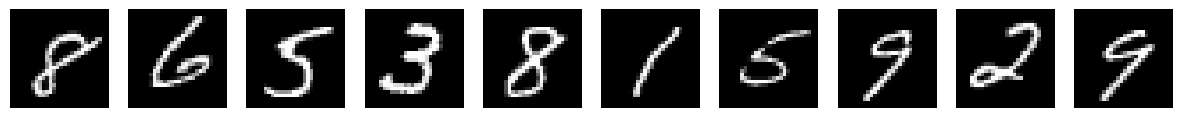

Total size: train=60000, test =10000


In [ ]:
# example of using MNIST load and display  functions
(x_train, y_train), (x_test, y_test) = load_mnist()
display_mnist(x_train[:10],1,10)
print('Total size: train={}, test ={}'.format(len(x_train), len(x_test)))

1. Retrieval, Clustering, and NN Classification

**Retrieval**: Implement the function get_nearest using Euclidean (L2) distance. Check that get_nearest(x_test[0], x_train) returns i=6156. Report the index of the closest example in x_train to x_test[1].

In [ ]:
# Retrieval

def get_nearest(X_query, X):
  ''' Return the index of the sample in X that is closest to X_query according
      to L2 distance '''
  # # TO DO
  # min_dist = np.inf
  # index = 0
  # for i, x in enumerate(X):
  #   ''' My 1st attempt. Doesn't work because this only account for 2 dimensions'''
  #   # dist = np.sqrt((x[0] - X_query[0])**2 + (x[1] - X_query[1])**2)

  #   ''' ChatGPT answer, uses vectorization to get min distance across all
  #   dimensions following/expanding the C^2 = A^2 + B^2'''
  #   dist = np.linalg.norm(x - X_query)

  #   ''' My ~very~ slow multi-dimensional distance calculator (no sqrt needed)'''
  # #   dist = 0
  # #   for j, dim in enumerate(x):
  # #     dist += (X_query[j] - dim)**2

  #   if dist <= min_dist:
  #     min_dist = dist
  #     index = i
  # return index

  ## ^^ All that just to find out the answer is in the slides :/
  nearest_i = -1
  mindist = np.Inf
  for i in np.arange(len(X)):
    dist = np.sum((X_query - X[i])**2)
    if dist < mindist:
      mindist = dist
      nearest_i = i
  return nearest_i

j = get_nearest(x_test[0], x_train)
print(j)
j = get_nearest(x_test[1], x_train)
print(j)

6156
31117


**K-means**: Using your get_nearest function, write a function kmeans that iteratively assigns each data point to the nearest cluster center.  Apply it to only the first 1000 examples, x_train[:1000]. Try this with K = 10 and K = 30, and display the cluster centers after each iteration. Include the displays from after the 1st and 10th iteration for K=30 in your report. See the note in the assignment if your cluster centers do not seem to be changing.


Cluster center after iteration 1:


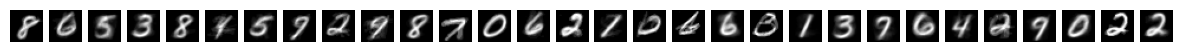

Cluster center after iteration 10:


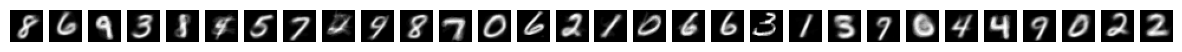

In [ ]:
# K-means

def kmeans(X, K, niter=10):
  '''
  Starting with the first K samples in X as cluster centers, iteratively assign each
  point to the nearest cluster and compute the mean of each cluster.
  Input: X[i] is the ith sample, K is the number of clusters, niter is the number of iterations
  Output: K cluster centers
  '''

  # TO DO -- implement kmeans and add code to display cluster centers at each iteration

  # Create cluster centers
  centers = X[:K].copy()

  for iteration in range(niter):
    # set idx to X's shape
    idx = np.zeros(len(X))

    for n in range(len(X)):
      # get index of nearest center
      idx[n] = get_nearest(X[n], centers)

    for k in range(K):
      # get mean of data points assigned to cluster k
      centers[k] = X[idx == k].mean(axis=0)

    if iteration == 0 or iteration == 9:
      print(f"Cluster center after iteration {iteration + 1}:")
      # ChatGPT is used to know how reshape works
      display_mnist(centers.reshape(-1, 28, 28), 1, K)

  return centers

K=30
centers = kmeans(x_train[:1000], K, 30)



**1-NN**: Now, use your get_nearest function to perform 1-nearest neighbor. For each test sample, find the index of the closest sample in the training data to predict its label. To check your method, calculate the error for the first 100 test samples using only the first 1,000 training samples; the error should be 19%. Report the percent error for the first 100 test samples using the first 10,000 training samples.

In [ ]:
# 1-NN

# TO DO
def one_nearest_neighbor(X_train, y_train, X_test):
    """
    Perform 1-nearest neighbor classification.

    Args:
    X_train: Training samples (N_train x D)
    y_train: Training labels (N_train)
    X_test: Test samples (N_test x D)

    Returns:
    y_pred: Predicted labels for test samples
    """
    y_pred = []
    for x_test in X_test:
        nearest_idx = get_nearest(x_test, X_train)
        y_pred.append(y_train[nearest_idx])
    return np.array(y_pred)

def calculate_error(y_true, y_pred):
    """
    Calculate the percent error between true labels and predicted labels.

    Args:
    y_true: True labels
    y_pred: Predicted labels

    Returns:
    percent_error: Percentage of incorrect predictions
    """
    errors = 0
    for i in range(len(y_true)):
        if y_true[i] != y_pred[i]:
            errors += 1

    percent_error = (errors / len(y_true)) * 100
    return percent_error


### USE .copy() TIP FROM INSTRUCTIONS TO NOT MESS UP DATA ###

# calculate error for first 100 test samples using first 1,000 training samples
x1000_train = x_train[:1000].copy()
y1000_train = y_train[:1000].copy()
x100_test = x_test[:100].copy()
y100_test = y_test[:100].copy()

# 1-NN
y1_pred = one_nearest_neighbor(x1000_train, y1000_train, x100_test)

# Calculate the percent error
error = calculate_error(y100_test, y1_pred)
print(f"Percent error: {error:.2f}%")

# calculate error for first 100 test samples using first 10,000 training samples
x10000_train = x_train[:10000].copy()
y10000_train = y_train[:10000].copy()


# Perform 1-NN classification
y2_pred = one_nearest_neighbor(x10000_train, y10000_train, x100_test)

# Calculate the percent error
error = calculate_error(y100_test, y2_pred)
print(f"Percent error: {error:.2f}%")

Percent error: 19.00%
Percent error: 7.00%


2. Make it fast

In [ ]:
# install libraries you need for part 2
!apt install libomp-dev
!pip install faiss-cpu
import faiss
import time

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libomp-dev is already the newest version (1:14.0-55~exp2).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


**Retrieval**: Exact search can be performed using the code below.
```
index = faiss.IndexFlatL2(X.shape[1])  # set for exact search
index.add(x_train) # add the data
dist, idx = index.search(x_test[:2],1) # returns index and sq err for each sample
```
Check that idx matches your retrieved indices from Part 1.  

In [ ]:
# retrieval

# TO DO (check that you're using FAISS correctly)

index = faiss.IndexFlatL2(x_train.shape[1])
index.add(x_train)
dist, idx = index.search(x_test[:2],1)

print(idx)

j = get_nearest(x_test[0], x_train)
print(j)
j = get_nearest(x_test[1], x_train)
print(j)

[[ 6156]
 [31117]]
6156
31117


**K-means**: Complete fast_kmeans using FAISS for the retrieval instead of your get_nearest function. In each iteration, create a new index, add the cluster centers, and find the nearest center to all samples.  Once it's working, disable any print or display functions inside the kmeans loop.

Record the root mean squared error (RMSE) at the start of each iteration, and plot the RMSE for each iteration for K=10, K=30, and K=100 when clustering the full training set with 20 iterations.

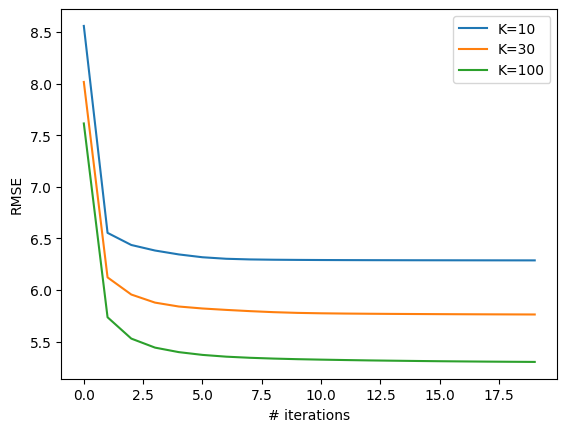

In [ ]:
# K-means fast

def kmeans_fast(X, K, niter=10):
  '''
  Starting with the first K samples in X as cluster centers, iteratively assign each
  point to the nearest cluster using faiss and compute the mean of each cluster.
  Input: X[i] is the ith sample, K is the number of clusters, niter is the number of iterations
  Output: K cluster centers
  '''

  # TO DO (you can base this on part 1, but use FAISS for search)
  # if you include display code, you need to re-organize the plotting code below

  # Initialize cluster centers with the first K samples
  centers = X[:K].copy()
  rmse_history = []

  for iteration in range(niter):
    # get index of nearest center (using FAISS)
    index = faiss.IndexFlatL2(X.shape[1])
    index.add(centers)
    distances, idx = index.search(X, 1)
    idx = idx.flatten()

    for k in range(K):
      # get mean of data points assigned to cluster k
      centers[k] = X[idx == k].mean(axis=0)

    # Compute RMSE for this iteration (used ChatGPT to realize distances gives L2)
    rmse = np.sqrt(np.mean(distances))
    rmse_history.append(rmse)

  # Plot RMSE over iterations
  plt.plot(np.arange(len(rmse_history)), rmse_history, label=f'K={K}')
  plt.legend(), plt.ylabel('RMSE'), plt.xlabel('# iterations')

  return centers

kmeans_fast(x_train, K=10, niter=20)
kmeans_fast(x_train, K=30, niter=20)
kmeans_fast(x_train, K=100, niter=20)

plt.show()

**1-NN**: Use FAISS to evaluate 1-NN on the full training and test sets.  Try this with both the exact search and LSH approximate search.  The only difference is how you set up the index.  

For LSH, use:
```
dim = X.shape[1]
index = faiss.IndexLSH(dim, dim)
```

Evaluate 1-NN using each search method, while varying the number of training samples: s in [100,1000, 10000, 60000].  In each case, use x_train[:s] as the train set.  Plot number of samples vs. percent error on a semilogx plot for both exact and LSH (on the same plot).  Also, record timings using `time.time()` and plot samples vs. time on a semilogx plot.

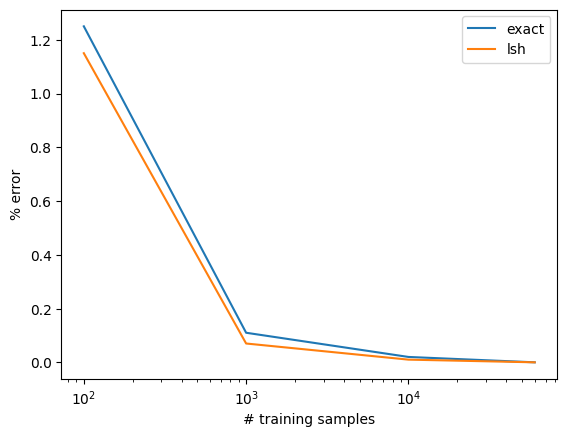

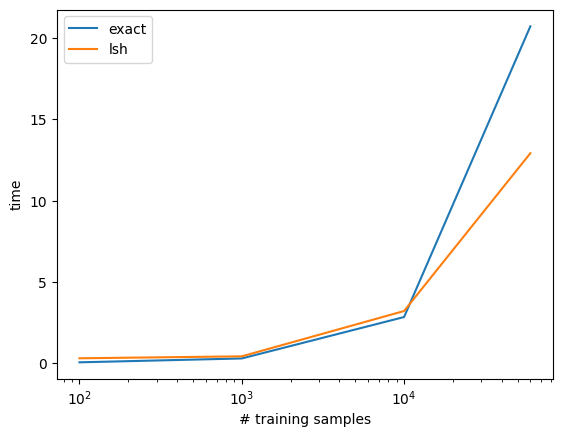

In [ ]:
# 1-NN

nsample = [100, 1000, 10000, 60000]

# TO DO
# Initialize placeholders for results as NumPy arrays
acc_exact = np.array([])
acc_lsh = np.array([])
timing_exact = np.array([])
timing_lsh = np.array([])

for s in nsample:
    x_train_sample = x_train[:s].copy()
    features_count = x_train_sample.shape[1]

    # Exact search with FAISS
    index_exact = faiss.IndexFlatL2(features_count)
    index_exact.add(x_train_sample)

    start_time = time.time()
    dist_exact, idx_exact = index_exact.search(x_test, 1)
    timing_exact = np.append(timing_exact, time.time() - start_time)

    # Calculate percent error for exact search
    percent_error_exact = calculate_error(y_test, idx_exact.flatten())
    acc_exact = np.append(acc_exact, (percent_error_exact / 100.0))

    # LSH Search with FAISS
    index_lsh = faiss.IndexLSH(features_count, features_count)
    index_lsh.add(x_train_sample)

    start_time = time.time()
    dist_lsh, idx_lsh = index_lsh.search(x_test, 1)
    timing_lsh = np.append(timing_lsh, time.time() - start_time)

    # Calculate percent error for LSH search
    percent_error_lsh = calculate_error(y_test, idx_lsh.flatten())
    acc_lsh = np.append(acc_lsh, (percent_error_lsh / 100.0))

plt.semilogx(nsample, (1-acc_exact)*100, label='exact')
plt.semilogx(nsample, (1-acc_lsh)*100, label='lsh')
plt.legend(), plt.ylabel('% error'), plt.xlabel('# training samples')
plt.show()

plt.semilogx(nsample, timing_exact, label='exact')
plt.semilogx(nsample, timing_lsh, label='lsh')
plt.legend(), plt.ylabel('time'), plt.xlabel('# training samples')
plt.show()


In your report, indicate which label is most often confused with ‘3’ when using the full training set and exact search for 1-NN.  

In [ ]:
# Confusion matrix
import sklearn
from sklearn.metrics import confusion_matrix

# TO DO

'''
# Followed instructions from
# https://www.w3schools.com/python/python_ml_confusion_matrix.asp after hint
# from TA to use sklearn confusion matrix
'''
# 0. Make a copy to not modify x_train
x_train_sample = x_train.copy()
features_count = x_train_sample.shape[1]

# 1. Exact search with FAISS
index_exact = faiss.IndexFlatL2(features_count)
index_exact.add(x_train_sample)
dist_exact, idx_exact = index_exact.search(x_test, 1)

# 2. Get predicted labels
y_pred_exact = y_train[idx_exact.flatten()]

# 3. Get the confusion matrix
cm_exact = confusion_matrix(y_test, y_pred_exact)

# 4. Print the confusion matrix
print(cm_exact)

[[ 973    1    1    0    0    1    3    1    0    0]
 [   0 1129    3    0    1    1    1    0    0    0]
 [   7    6  992    5    1    0    2   16    3    0]
 [   0    1    2  970    1   19    0    7    7    3]
 [   0    7    0    0  944    0    3    5    1   22]
 [   1    1    0   12    2  860    5    1    6    4]
 [   4    2    0    0    3    5  944    0    0    0]
 [   0   14    6    2    4    0    0  992    0   10]
 [   6    1    3   14    5   13    3    4  920    5]
 [   2    5    1    6   10    5    1   11    1  967]]


## Part 3: Temperature Regression

Include all your code used for part 3 in this section.  

In [ ]:
import numpy as np
from google.colab import drive
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# load data (modify to match your data directory or comment)
def load_temp_data():
  drive.mount('/content/drive')
  datadir = "/content/drive/My Drive/CS441/24FA/hw1/"
  T = np.load(datadir + 'temperature_data.npz')
  xt_train, yt_train, xt_val, yt_val, xt_test, yt_test, dates_train, dates_val, dates_test, feature_to_city, feature_to_day = \
  T['x_train'], T['y_train'], T['x_val'], T['y_val'], T['x_test'], T['y_test'], T['dates_train'], T['dates_val'], T['dates_test'], T['feature_to_city'], T['feature_to_day']
  return (xt_train, yt_train, xt_val, yt_val, xt_test, yt_test, dates_train, dates_val, dates_test, feature_to_city, feature_to_day)

# plot one data point for listed cities and target date
def plot_temps(x, y, cities, feature_to_city, feature_to_day, target_date):
  nc = len(cities)
  ndays = 5
  xplot = np.array([-5,-4,-3,-2,-1])
  yplot = np.zeros((nc,ndays))
  for f in np.arange(len(x)):
    for c in np.arange(nc):
      if cities[c]==feature_to_city[f]:
        yplot[feature_to_day[f]+ndays,c] = x[f]
  plt.plot(xplot,yplot)
  plt.legend(cities)
  plt.plot(0, y, 'b*', markersize=10)
  plt.title('Predict Temp for Cleveland on ' + target_date)
  plt.xlabel('Day')
  plt.ylabel('Avg Temp (C)')
  plt.show()




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Feature 361: city = Cleveland, day= -1
Baseline - prediction using previous day: RMSE=3.460601246750482


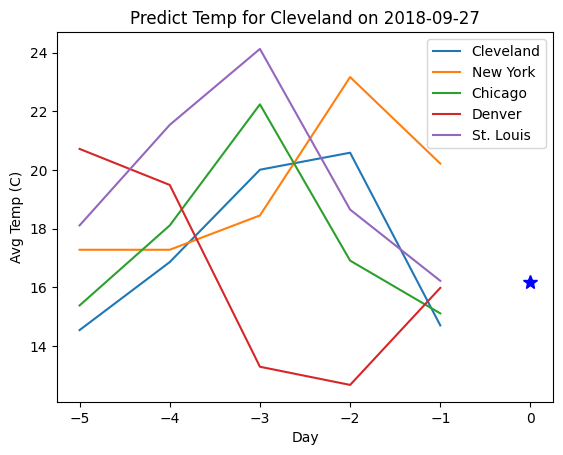

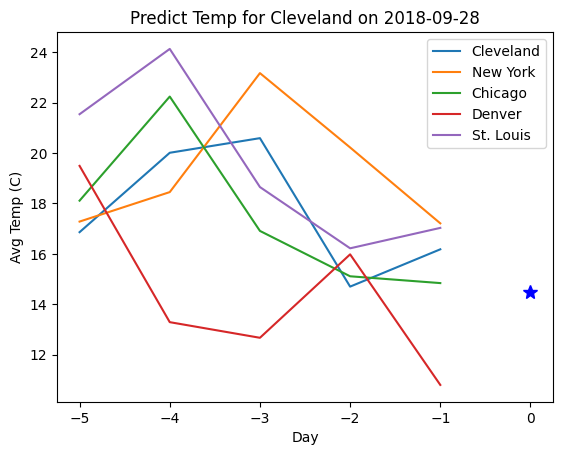

In [ ]:
# load data (use xt and yt so that we aren't replacing the MNIST variables)
(xt_train, yt_train, xt_val, yt_val, xt_test, yt_test, dates_train, dates_val, dates_test, feature_to_city, feature_to_day) = load_temp_data()
''' Data format:
      x_train, y_train: features and target value for each training sample (used to fit model)
      x_val, y_val: features and target value for each validation sample (used to select hyperparameters, such as regularization and K)
      x_test, y_test: features and target value for each test sample (used to evaluate final performance)
      dates_xxx: date of the target value for the corresponding sample
      feature_to_city: maps from a feature number to the city
      feature_to_day: maps from a feature number to a day relative to the target value, e.g. -2 means two days before
      Note: 361 is the temperature of Cleveland on the previous day
'''
f = 361
print('Feature {}: city = {}, day= {}'.format(f,feature_to_city[f], feature_to_day[f]))
baseline_rmse = np.sqrt(np.mean((yt_val[1:]-yt_val[:-1])**2)) # root mean squared error example
print('Baseline - prediction using previous day: RMSE={}'.format(baseline_rmse))

# plot first two x/y for val
plot_temps(xt_val[0], yt_val[0], ['Cleveland', 'New York', 'Chicago', 'Denver', 'St. Louis'], feature_to_city, feature_to_day, dates_val[0])
plot_temps(xt_val[1], yt_val[1], ['Cleveland', 'New York', 'Chicago', 'Denver', 'St. Louis'], feature_to_city, feature_to_day, dates_val[1])



**KNN Regression**: Perform 5-NN regression, reporting RMSE for two variants:


1.   Original features
2.   Normalize the features by subtracting the previous day’s Cleveland temperature. I.e., if previous day’s Cleveland temperature is `c`, features are `X`, and value to predict is `y`, then predict `y_query-c = NN(X_query, X-c, y-c)`

For these experiments, train on (x_train, y_train) and test on (x_test, y_test). To validate your method, if you set `K=3`, you should get an RMSE of `3.314` for the original features.


In [ ]:
# K-NN Regression

def regress_KNN(X_trn, y_trn, X_tst, K=1):
  '''
  Predict the target value for each data point in X_tst using a
  K-nearest neighbor regressor based on (X_trn, y_trn), with L2 distance.
  Input: X_trn[i] is the ith training data. y_trn[i] is the ith training label. K is the number of closest neighbors to use.
  Output: return y_pred, where y_pred[i] is the predicted ith test value
  '''

  # Convert to np to use efficient np methods
  y_pred = np.zeros(X_tst.shape[0])

  for i in range(X_tst.shape[0]):
    # (1) Compute distances between X_query and each sample in X_train
    distances = np.linalg.norm(X_trn - X_tst[i, :], axis=1)

    # (2) Get the K_smallest_idx: K indices corresponding to smallest distances(e.g. use np.argsort)
    knn_indices = np.argsort(distances)[:K]

    # (3) Return the mean of y_train[K_smallest_idx]
    y_pred[i] = np.mean(y_trn[knn_indices])

  return y_pred
  # TO DO

def normalize_features(x, y, fnum):
  ''' Normalize the features in x and y.
      For each data sample i:
        x2[i] = x[i]-x[i,fnum]
        y2[i] = y[i]-x[i,fnum]
  '''
  # TO DO

  # np copy to utilize np optimization techniques
  x_normal = np.copy(x)
  y_normal = np.copy(y)

  for i in range(x.shape[0]):
      x_normal[i] = x[i] - x[i, fnum]
      y_normal[i] = y[i] - x[i, fnum]

  return x_normal, y_normal

# KNN with original features

# 3-NN regression original
y_pred_original = regress_KNN(xt_train, yt_train, xt_test, K=3)

# Calculate RMSE for original features
rmse3_original = np.sqrt(np.mean((yt_test - y_pred_original)**2))
print(f"RMSE 3-NN: {rmse3_original:.4g}")

# TO DO
# 5-NN regression original
y_pred_original = regress_KNN(xt_train, yt_train, xt_test, K=5)

# Calculate RMSE for original features
rmse5_original = np.sqrt(np.mean((yt_test - y_pred_original)**2))
print(f"RMSE 5-NN original: {rmse5_original:.4g}")

# KNN with normalized features
fnum = 361 # previous day temp in Cleveland

# TO DO
xt_train_norm, yt_train_norm = normalize_features(xt_train, yt_train, fnum)
xt_val_norm, yt_val_norm = normalize_features(xt_test, yt_test, fnum)

# 5-NN regression normalized
y_pred_normalized = regress_KNN(xt_train_norm, yt_train_norm, xt_val_norm, K=5)

# Calculate RMSE for normalized features
rmse_normalized = np.sqrt(np.mean((yt_val_norm - y_pred_normalized)**2))
print(f"RMSE 5-NN normalized: {rmse_normalized:.4g}")

RMSE 3-NN: 3.314
RMSE 5-NN original: 3.19
RMSE 5-NN normalized: 2.9


## Part 5: Stretch Goals
Include all your code used for part 5 in this section. You can copy-paste code from parts 1-3 if it is re-usable.

Compare K-NN on the MNIST classification for N=1, 3, 5, 11, 25. For these tests, use x_train[:50000] as a training set and x_train[50000:] as a validation set.  Report error on the validation set for all parameters. Then performance on the test set for the best parameter using the full training set.

When K is greater than 1, return the most common label of the nearest samples.  *If there 	is a tie, return the most common label with the closest sample.*

In [ ]:
# Stretch: KNN classification (Select K)

# Use Counter which was taught in CS440
from collections import Counter

def K_nearest_neighbor(x_train, y_train, x_test, K=1):
  """
  Perform K-nearest neighbor classification.

  Args:
  X_train: Training samples (N_train x D)
  y_train: Training labels (N_train)
  X_test: Test samples (N_test x D)

  Returns:
  y_pred: Predicted labels for test samples
  """

  y_pred = []

  # get_K_nearest()
  index = faiss.IndexFlatL2(x_train.shape[1])
  index.add(x_train)
  dist, nearest_neighbors_idx = index.search(x_test, K)

  for i in range(len(x_test)):
    nearest_labels = y_train[nearest_neighbors_idx[i]]
    label_counts = Counter(nearest_labels)

    max_count = max(label_counts.values())
    most_common_label = [label for label, count in label_counts.items() if count == max_count]

    # Settle tie breakers with min(distance)
    if len(most_common_label) > 1:
      tie_idx = np.argmin(dist[i][:len(most_common_label)])
      y_pred.append(most_common_label[tie_idx])
    else:
      y_pred.append(most_common_label[0])

  return np.array(y_pred)

# Training and validation sets
x_train_partial = x_train[:50000].copy()
y_train_partial = y_train[:50000].copy()
x_val = x_train[50000:].copy()
y_val = y_train[50000:].copy()

# Testing different values of K
# K_values = [1, 3, 5, 11, 25]
K_values = [1, 3, 5, 11, 25]
for K in K_values:
    y_pred = K_nearest_neighbor(x_train_partial, y_train_partial, x_val, K)
    error = calculate_error(y_val, y_pred)
    print(f"K={K} Percent Error: {error:.2f}%")

K=1 Percent Error: 3.04%
K=3 Percent Error: 2.85%
K=5 Percent Error: 3.02%
K=11 Percent Error: 3.50%
K=25 Percent Error: 4.30%


In [ ]:
# After running each K, I found 3 to be the most accurate, so run K=3 on the entire training and testing set

y_test_pred = K_nearest_neighbor(x_train.copy(), y_train.copy(), x_test.copy(), 3)

# Calculate the final error on the test set
test_error = calculate_error(y_test.copy(), y_test_pred)
print(f"K=3 Percent Error: {test_error:.2f}%")

K=3 Percent Error: 2.83%


Compare K-NN on the temperature regression dataset for N=1, 3, 5, 11, 25 using both feature types. Report all results on the validation set, and then run the single best setting on the test set, using all training samples.

In [ ]:
# Stretch: KNN regression (Select K)

# (xt_train, yt_train, xt_val, yt_val, xt_test, yt_test, dates_train, dates_val, dates_test, feature_to_city, feature_to_day) = load_temp_data()

# KNN with original features
K_values = [1, 3, 5, 11, 25]
for K in K_values:
    # Perform K-NN regression
    y_pred_original = regress_KNN(xt_train, yt_train, xt_val, K=K)

    # Calculate RMSE for original features
    rmse_original = np.sqrt(np.mean((yt_test - y_pred_original)**2))
    print(f"RMSE {K}-NN original: {rmse_original:.3g}")


# KNN with normalized features
fnum = 361  # Previous day temp in Cleveland

# Normalize train and test data
xt_train_norm, yt_train_norm = normalize_features(xt_train, yt_train, fnum)
xt_val_norm, yt_val_norm = normalize_features(xt_val, yt_val, fnum)

for K in K_values:
    # Perform K-NN regression with normalized data
    y_pred_normalized = regress_KNN(xt_train_norm, yt_train_norm, xt_val_norm, K=K)

    # Calculate RMSE for normalized features
    rmse_normalized = np.sqrt(np.mean((yt_val_norm - y_pred_normalized)**2))
    print(f"RMSE {K}-NN normalized: {rmse_normalized:.3g}")

RMSE 1-NN original: 6.23
RMSE 3-NN original: 5.07
RMSE 5-NN original: 4.86
RMSE 11-NN original: 4.62
RMSE 25-NN original: 4.47
RMSE 1-NN normalized: 3.94
RMSE 3-NN normalized: 3.26
RMSE 5-NN normalized: 3.08
RMSE 11-NN normalized: 2.92
RMSE 25-NN normalized: 2.92


In [ ]:
xt_train_norm, yt_train_norm = normalize_features(xt_train, yt_train, fnum)
xt_test_norm, yt_test_norm = normalize_features(xt_test, yt_test, fnum)

y_pred_normalized = regress_KNN(xt_train_norm, yt_train_norm, xt_test_norm, K=K)

# Calculate RMSE for normalized features
rmse_normalized = np.sqrt(np.mean((yt_test_norm - y_pred_normalized)**2))
print(f"RMSE {K}-NN normalized: {rmse_normalized:.3g}")

RMSE 25-NN normalized: 2.77


For K-means (on MNIST), does running with multiple re-runs or running a single run longer tend to provide lower RMSE?  For this, you can use the FAISS Kmeans function. Syntax is below.

```
 	kmeans = faiss.Kmeans(x_train.shape[1], 30, niter=10, nredo=1, seed=int(t))
  	kmeans.train(x_train)
	dist, idx = kmeans.index.search(x_train, 1)
	rmse = np.sqrt(np.sum(dist) / x_train.shape[0])
```
Compare (niter=10, nredo=5) vs. (niter=50, nredo=1) for K=30. Repeat this test five times and report the mean and standard deviation of the RMSE.
Compare (niter=4, nredo=5) vs. (niter=20, nredo=1) for K=30. Repeat this test five times and report the mean and standard deviation of the RMSE.


In [ ]:
# Stretch: K-means (more iters vs redos)

# 1. niter=10, nredo=5
rmses_1 = []
for t in range(5):
    kmeans = faiss.Kmeans(x_train.shape[1], 30, niter=10, nredo=5, seed=int(t))
    kmeans.train(x_train)
    dist, _ = kmeans.index.search(x_train, 1)
    rmse = np.sqrt(np.sum(dist) / x_train.shape[0])
    rmses_1.append(rmse)

mean_rmse_1 = np.mean(rmses_1)
std_rmse_1 = np.std(rmses_1)

print(f"niter=10, nredo=5 \nMean RMSE: {mean_rmse_1:.4f}, \nStd Dev: {std_rmse_1:.4f}\n")

# 2. niter=50, nredo=1
rmses_2 = []
for t in range(5):
    kmeans = faiss.Kmeans(x_train.shape[1], 30, niter=50, nredo=1, seed=int(t))
    kmeans.train(x_train)
    dist, _ = kmeans.index.search(x_train, 1)
    rmse = np.sqrt(np.sum(dist) / x_train.shape[0])
    rmses_2.append(rmse)

mean_rmse_2 = np.mean(rmses_2)
std_rmse_2 = np.std(rmses_2)

print(f"niter=50, nredo=1 \nean RMSE: {mean_rmse_2:.4f}, \nStd Dev: {std_rmse_2:.4f}\n")


# 3. niter=4, nredo=5
rmses_3 = []
for t in range(5):
    kmeans = faiss.Kmeans(x_train.shape[1], 30, niter=4, nredo=5, seed=int(t))
    kmeans.train(x_train)
    dist, _ = kmeans.index.search(x_train, 1)
    rmse = np.sqrt(np.sum(dist) / x_train.shape[0])
    rmses_3.append(rmse)

mean_rmse_3 = np.mean(rmses_3)
std_rmse_3 = np.std(rmses_3)

print(f"niter=4, nredo=5 \nMean RMSE: {mean_rmse_3:.4f}, \nStd Dev: {std_rmse_3:.4f}\n")


# 4. niter=20, nredo=1
rmses_4 = []
for t in range(5):
    kmeans = faiss.Kmeans(x_train.shape[1], 30, niter=20, nredo=1, seed=int(t))
    kmeans.train(x_train)
    dist, _ = kmeans.index.search(x_train, 1)
    rmse = np.sqrt(np.sum(dist) / x_train.shape[0])
    rmses_4.append(rmse)

mean_rmse_4 = np.mean(rmses_4)
std_rmse_4 = np.std(rmses_4)

print(f"niter=20, nredo=1 \nMean RMSE: {mean_rmse_4:.4f}, \nStd Dev: {std_rmse_4:.4f}")


niter=10, nredo=5 
Mean RMSE: 5.7842, 
Std Dev: 0.0086

niter=50, nredo=1 
ean RMSE: 5.7800, 
Std Dev: 0.0082

niter=4, nredo=5 
Mean RMSE: 5.8261, 
Std Dev: 0.0065

niter=20, nredo=1 
Mean RMSE: 5.7862, 
Std Dev: 0.0107


In [ ]:
# from https://gist.github.com/jonathanagustin/b67b97ef12c53a8dec27b343dca4abba
# For use in Colab.  For local, just use jupyter nbconvert directly

import os
# @title Convert Notebook to PDF. Save Notebook to given directory
NOTEBOOKS_DIR = "/content/drive/My Drive/CS441/24FA/hw1" # @param {type:"string"}
NOTEBOOK_NAME = "CS441_FA24_HW1_Starter.ipynb" # @param {type:"string"}
#------------------------------------------------------------------------------#
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)
NOTEBOOK_PATH = f"{NOTEBOOKS_DIR}/{NOTEBOOK_NAME}"
assert os.path.exists(NOTEBOOK_PATH), f"NOTEBOOK NOT FOUND: {NOTEBOOK_PATH}"
!apt install -y texlive-xetex texlive-fonts-recommended texlive-plain-generic > /dev/null 2>&1
!jupyter nbconvert "$NOTEBOOK_PATH" --to pdf > /dev/null 2>&1
NOTEBOOK_PDF = NOTEBOOK_PATH.rsplit('.', 1)[0] + '.pdf'
assert os.path.exists(NOTEBOOK_PDF), f"ERROR MAKING PDF: {NOTEBOOK_PDF}"
print(f"PDF CREATED: {NOTEBOOK_PDF}")

Mounted at /content/drive/


AssertionError: ERROR MAKING PDF: /content/drive/My Drive/CS441/24FA/hw1/CS441_FA24_HW1_Starter.pdf